In [1]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = read_csv('creditcard.csv')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN 
import pyod
from pyod.utils.data import evaluate_print
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
import numpy as np
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers
import seaborn as sns 
from sklearn.neighbors import NearestNeighbors

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [37]:
len(df.index)

284807

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
print(df.groupby('isFraud')['type'].count())

isFraud
0    6354407
1       8213
Name: type, dtype: int64


In [6]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
df.loc[:,['type']]=le.fit_transform(df.loc[:,['type']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
df.loc[:,['nameOrig']]=le.fit_transform(df.loc[:,['nameOrig']])
df.loc[:,['nameDest']]=le.fit_transform(df.loc[:,['nameDest']])

In [9]:
df.nameOrig.value_counts()

2964663    3
213775     3
3455282    3
1742342    3
3207898    3
          ..
2416178    1
2420276    1
2424374    1
2395704    1
0          1
Name: nameOrig, Length: 6353307, dtype: int64

In [10]:
df2=df[df.columns.drop(['step','nameOrig','nameDest','isFraud','isFlaggedFraud'])].copy()

In [3]:
df2=df[df.columns.drop(['Time','Class'])].copy()


In [5]:
data=df2.values

In [7]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(data)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

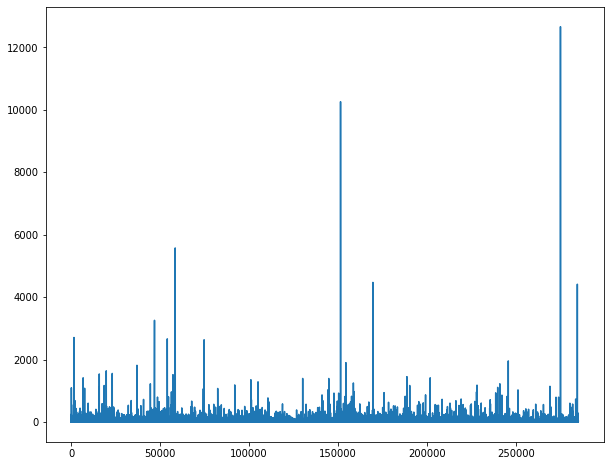

In [10]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(data)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [9]:
plt.rcParams["figure.figsize"] = (10,8)

In [25]:
outlier_index = np.where(distances.mean(axis = 1) >1000)
outlier_values = df.iloc[outlier_index]
outlier_values.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
6783,8544.0,-6.571336,-11.943892,-4.246322,6.825816,-2.896624,2.706661,5.373923,-0.872187,-0.626203,...,2.220493,-2.395098,-3.731391,-1.015761,-0.740824,-0.297883,-0.793710,0.680622,4002.88,0
7617,10538.0,-6.487286,-13.630449,-3.190735,2.890879,-5.115535,2.393873,3.759791,-0.587387,0.816890,...,2.364465,-1.835567,-3.435921,-0.125621,-1.311011,-0.663526,-0.702356,0.694100,3995.92,0
15714,27147.0,-6.443738,-13.792197,-2.972727,3.132179,-5.983778,1.276738,4.029743,-0.879509,0.235719,...,1.729126,-3.183478,-3.334090,0.966115,-1.408661,0.531729,-0.746892,0.714763,4000.00,0
15835,27283.0,-10.410270,-19.917165,-6.833829,4.398751,-6.914945,0.953082,7.946898,-1.911031,-1.721496,...,3.261073,-4.055161,-5.342157,0.723590,-1.942346,0.358646,-1.235022,1.066446,6130.21,0
18570,29601.0,-5.715306,-0.094700,-7.856475,2.259661,-23.611865,16.493227,21.437514,-10.623397,-0.968764,...,1.781773,-0.875350,-4.113185,0.531372,-0.030760,0.429433,6.211230,-2.298957,5239.50,0
19760,30537.0,-14.191832,-25.313252,-7.578781,7.730844,-8.285413,3.994474,9.656752,-1.502509,-0.231141,...,4.696025,-4.067605,-6.869451,0.107527,-2.640366,-1.237598,-1.387145,1.389367,7879.42,0
23128,32605.0,-23.383129,-18.098804,-20.195367,4.249104,-42.147898,22.529298,36.677268,-4.862800,1.645619,...,-5.893230,-0.139751,-6.086173,1.924973,0.669689,0.449781,11.135740,-9.617915,7429.15,0
37000,38763.0,-14.711825,-23.250844,-7.631400,5.975826,-15.615302,8.060516,21.246173,-1.896157,-1.450057,...,4.413073,-0.491620,17.297845,-0.503495,1.939396,-1.049141,-2.457912,0.623320,6950.51,0


In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [26]:
outlier_values.Class.value_counts()

0    40
Name: Class, dtype: int64

Text(0.5, 1.0, 'Outlier Detection Using KNN ')

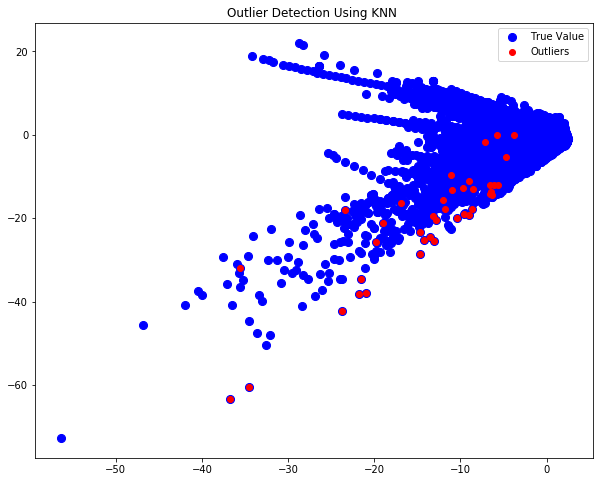

In [24]:
# plot data
plt.scatter(df["V1"], df["V2"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["V1"], outlier_values["V2"], color = "r")
plt.legend( ["True Value", "Outliers"])
plt.title("Outlier Detection Using KNN ")

In [6]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(data)

In [10]:
mask = yhat != -1
df_filterd_if= pd.DataFrame(data2[mask, :])

In [9]:
data2=df.values

In [13]:
mask = yhat == -1
outlier_values_if=pd.DataFrame(data2[mask, :])

In [17]:
outlier_values_if[30].value_counts()

0.0    13820
1.0      421
Name: 30, dtype: int64

Text(0.5, 1.0, 'Outlier Detection Using ISOLATION FOREST')

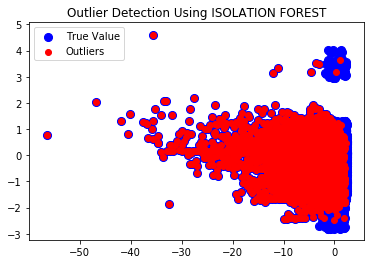

In [18]:
# plot data
plt.scatter(df['V1'], df['V24'], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values_if[1], outlier_values_if[24], color = "r")
plt.legend( ["True Value", "Outliers"])
plt.title("Outlier Detection Using ISOLATION FOREST")

In [19]:
len(outlier_values_if)

14241

In [11]:
df_filterd_if[30].value_counts()

0.0    270483
1.0        74
Name: 30, dtype: int64

In [12]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
x=df_filterd_if[df_filterd_if.columns.drop([0,30])].copy()
y=df_filterd_if[30].copy()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [17]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.41947296e-02, 6.24785095e-02, 5.76010730e-02, 5.28531400e-02,
       5.01091618e-02, 4.91112652e-02, 4.70741445e-02, 4.49593817e-02,
       4.44608940e-02, 4.32987660e-02, 4.14367936e-02, 3.98401955e-02,
       3.74913278e-02, 3.60796738e-02, 3.54224685e-02, 3.52441373e-02,
       3.45528994e-02, 3.44437962e-02, 3.38031901e-02, 2.72009761e-02,
       2.56226009e-02, 1.91514278e-02, 1.88395621e-02, 1.77033176e-02,
       1.46119306e-02, 1.31998687e-02, 8.71935758e-03, 3.99947543e-04,
       9.54634746e-05])

In [18]:
x=1
var_sum=0
for i in explained_variance:
    var_sum=var_sum+i
    print(var_sum,"  ", x)
    x=x+1

0.07419472959749729    1
0.13667323911907092    2
0.19427431208390275    3
0.2471274521266444    4
0.2972366139044511    5
0.3463478791172073    6
0.39342202366680906    7
0.43838140537204306    8
0.48284229938565004    9
0.5261410653807309    10
0.5675778590190053    11
0.607418054520283    12
0.6449093823314618    13
0.6809890560906282    14
0.7164115245905478    15
0.7516556618592958    16
0.7862085613062036    17
0.8206523575270634    18
0.8544555476542636    19
0.8816565238031634    20
0.907279124720714    21
0.9264305525190887    22
0.9452701145780505    23
0.9629734321404678    24
0.9775853627101017    25
0.990785231398306    26
0.9995045889822324    27
0.999904536525401    28
0.9999999999999998    29


In [151]:
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Simple SVM

In [25]:
from sklearn.svm import SVC

In [166]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [167]:
yhat = model.predict(X_test)

In [168]:
preds=pd.DataFrame()

In [169]:
preds['true']=np.array(y_test)
preds['pred']=np.array(yhat)

In [170]:
print("Ytrain :" ,len(y_test))
print('Yhat:',len(yhat))

Ytrain : 54114
Yhat: 54114


In [171]:
preds.pred.value_counts()

0.0    54112
1.0        2
Name: pred, dtype: int64

In [175]:
len(preds[preds['pred']==0])

54112

# One Class SVM

In [177]:
x=df_filterd_if[df_filterd_if.columns.drop([0,30])].copy()

In [179]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.02).fit(x)

In [199]:
y_pred = model.fit_predict(x)
y_pred

array([ 1,  1, -1, ...,  1,  1,  1], dtype=int64)

In [200]:
scores = model.score_samples(x)

In [201]:
thresh = np.quantile(scores, 0.03)
print(thresh)

428.63346558898326


In [196]:
index = np.where(scores<=thresh)
values = df_filterd_if.iloc[index]

In [198]:
print(values.groupby(30)[1].count())

30
0.0    8102
1.0      15
Name: 1, dtype: int64


In [182]:
# filter outlier index
outlier_index = np.where(y_pred == -1) 
# filter outlier values
outlier_values = df_filterd_if.iloc[outlier_index]
outlier_values

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0.0
85,59.0,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,...,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,0.0
152,100.0,-0.378602,0.274579,-0.129488,-2.682799,-0.731375,-0.226354,-0.006949,-2.778983,-0.233232,...,1.426146,-2.776923,-0.466756,-0.714697,1.136720,-0.981993,0.356781,0.148444,182.95,0.0
199,140.0,-4.636534,-5.931717,-0.227301,-2.737271,7.672544,-0.996355,-3.391184,1.236267,1.129462,...,0.655844,-0.047158,0.869558,1.020755,0.706125,-0.207096,-0.167680,0.217685,65.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270197,172422.0,1.134958,-3.165261,-3.303764,-1.192681,-0.869890,-1.112794,0.744975,-0.646199,-2.181248,...,0.514643,0.455557,-0.776032,-0.440389,0.396356,0.247182,-0.207241,0.007318,665.70,0.0
270310,172539.0,-5.823560,0.333130,-0.732746,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,...,-0.384073,-0.204040,-1.113031,0.258388,0.732836,-0.231069,-0.049823,-0.019875,150.00,0.0
270345,172569.0,-1.762664,-1.230888,-0.587727,-1.898574,-2.611232,1.301447,3.645126,-0.911945,1.133300,...,-0.526145,-0.121367,0.631407,-0.416585,-1.338263,0.006724,-0.084768,0.308717,724.00,0.0
270376,172595.0,-3.881978,-2.408392,-1.458041,0.432474,2.792532,-1.509535,1.160473,-1.875000,-0.062457,...,0.233649,1.194132,0.040907,0.934926,0.772672,0.654286,0.600326,-0.355366,229.00,0.0


In [186]:
outlier_values[30] = (pd.to_numeric(outlier_values[30],downcast='integer'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [189]:
print(outlier_values.groupby(30)[1].count())

30
0    8089
1      15
Name: 1, dtype: int64


In [202]:
z=outlier_values[outlier_values[30]==1.0]

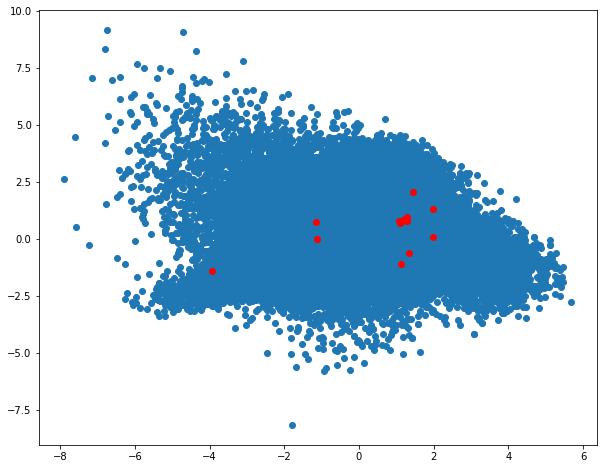

In [204]:
# visualize outputs
plt.scatter(x[2], x[5])
plt.scatter(z[2], z[5], c = "r")

# Process A

In [ ]:
df_filterd_if

In [19]:
from sklearn import metrics

In [20]:
x=df_filterd_if[df_filterd_if.columns.drop([0,30])].copy()
y=df_filterd_if[30].copy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [26]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
yhat = model.predict(X_test)

In [87]:
preds=pd.DataFrame()

In [88]:
preds['true']=np.array(y_test)
preds['pred']=np.array(yhat)

In [42]:
len(y_test)
y_test.value_counts()

0.0    54102
1.0       12
Name: 30, dtype: int64

In [ ]:
preds[(preds.true==1) & (preds.pred==0)]

In [48]:
len(preds[(preds.true==0) & (preds.pred==0)])

54102

In [212]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.9997782459252689


In [51]:
from sklearn.metrics import confusion_matrix

In [54]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[1][1])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[0][0])

In [89]:
print_confusion_matrix(preds['true'],preds['pred'])

True positive =  1
False positive =  0
False negative =  11
True negative =  54102


# Process B

In [214]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [56]:
x=df[df.columns.drop(['Time','Class'])].copy()
y=df['Class'].copy()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
yhat = model.predict(X_test)

In [61]:
len(y_test)

56962

In [60]:
len(y_test)
y_test.value_counts()

0    56865
1       97
Name: Class, dtype: int64

In [62]:
preds=pd.DataFrame()

In [63]:
preds['true']=np.array(y_test)
preds['pred']=np.array(yhat)

In [64]:
print_confusion_matrix(preds['true'],preds['pred'])

True positive =  72
False positive =  1
False negative =  25
True negative =  56864


In [220]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.9995435553526912


# PROCESS C

In [ ]:
df_filterd_if


In [65]:
x=df_filterd_if[df_filterd_if.columns.drop([0,30])].copy()
y=df_filterd_if[30].copy()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [67]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
yhat = model.predict(X_test)

In [70]:
preds=pd.DataFrame()
preds['true']=np.array(y_test)
preds['pred']=np.array(yhat)

In [71]:
print_confusion_matrix(preds['true'],preds['pred'])

True positive =  1
False positive =  0
False negative =  11
True negative =  54102


In [90]:
len(y_test)
y_test.value_counts()

0.0    54102
1.0       12
Name: 30, dtype: int64